In [35]:
import pandas as pd
import numpy as np
import re, urllib.parse, matplotlib, folium
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

In [36]:
df = pd.read_csv("clean_data.csv", low_memory=False)
df.head()

,id,Locality,Zip,Province,Type of property,Subtype of property,Type of sale,Price,Building condition,Building Cond. values,...,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
0,10578809,liedekerke,1770,Flemish Brabant,house,house,for sale,349000,As new,4,...,3,256.0,241,5,1,25.0,1,150.0,0.0,0.0
1,10578941,sint-andries,8200,West Flanders,house,house,for sale,625000,As new,4,...,3,539.0,292,5,0,0.0,1,400.0,0.0,0.0
2,10577515,seraing,4100,Liège,house,house,for sale,149000,Good,3,...,2,105.0,469,3,1,NaN,1,25.0,0.0,0.0
3,10577846,andenne,5300,Namur,house,house,for sale,335000,Good,3,...,1,2185.0,196,6,1,NaN,1,NaN,0.0,0.0
4,10523130,forest,1190,Brussels Capital Region,house,house,for sale,545000,To be done up,2,...,1,260.0,517,2,1,45.0,0,0.0,0.0,0.0


In [49]:
df.columns

Index(['id', 'Locality', 'Zip', 'Province', 'Type of property',
       'Subtype of property', 'Type of sale', 'Price', 'Building condition',
       'Building Cond. values', 'Number of facades', 'Number of rooms',
       'Living area', 'Furnished', 'Fully equipped kitchen', 'Kitchen values',
       'Surface of the land', 'Primary energy consumption', 'Energy_classes',
       'Terrace', 'Terrace surface', 'Garden', 'Garden surface', 'Open fire',
       'Swimming pool'],
      dtype='object')

In [78]:
house_target = ['Price','Living area','Number of rooms','Furnished','Garden','Garden surface','Terrace','Terrace surface','Open fire','Surface of the land','Number of facades','Swimming pool','Building Cond. values','Kitchen values','Primary energy consumption','Province',"Subtype of property"]
apartment_target = ['Price','Living area','Number of rooms','Furnished','Open fire','Building Cond. values','Kitchen values','Primary energy consumption','Province',"Subtype of property"]

In [79]:
house_df = df[df["Type of property"]=="house"][house_target]
apt_df = df[df["Type of property"]=="apartment"][apartment_target]

In [80]:
house_df_test = house_df.dropna(axis=0)

In [61]:
apt_df_test = apt_df.dropna(axis=0)

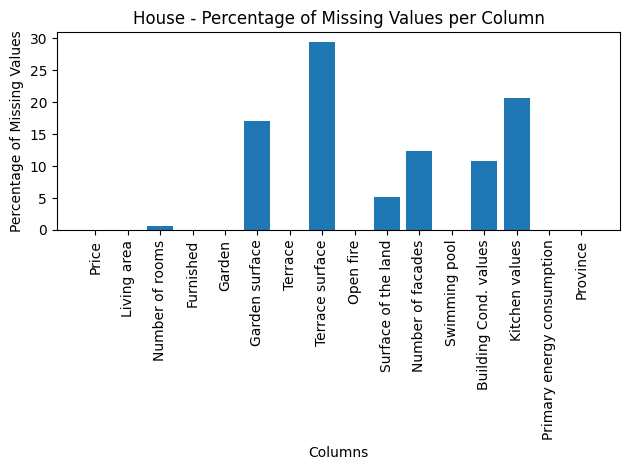

In [109]:
house_missing = (house_df.isnull().mean() * 100)

plt.bar(house_missing.index, house_missing)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('House - Percentage of Missing Values per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


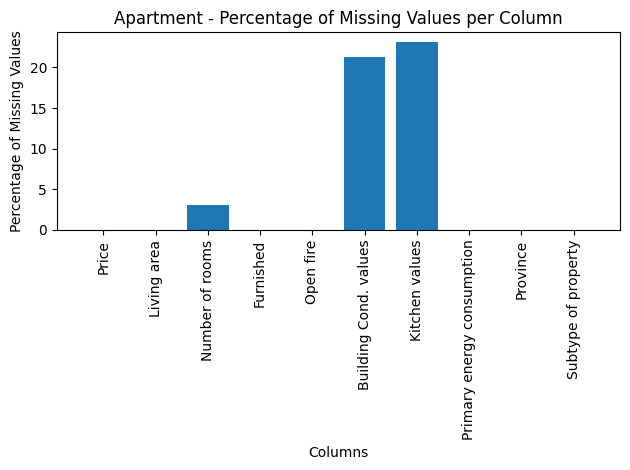

In [110]:
apt_missing = (apt_df.isnull().mean() * 100)

plt.bar(apt_missing.index, apt_missing)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Apartment - Percentage of Missing Values per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

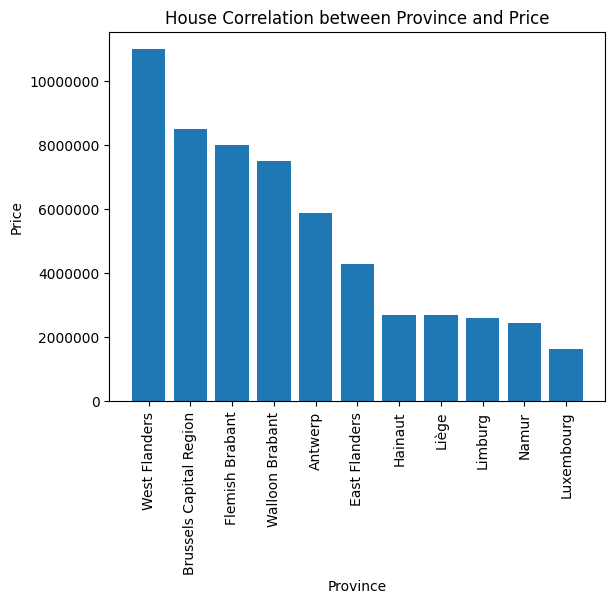

In [113]:
house_sorted_df = house_df.sort_values('Price', ascending=False)  

plt.bar(house_sorted_df['Province'], house_sorted_df['Price'])
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('House Correlation between Province and Price')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

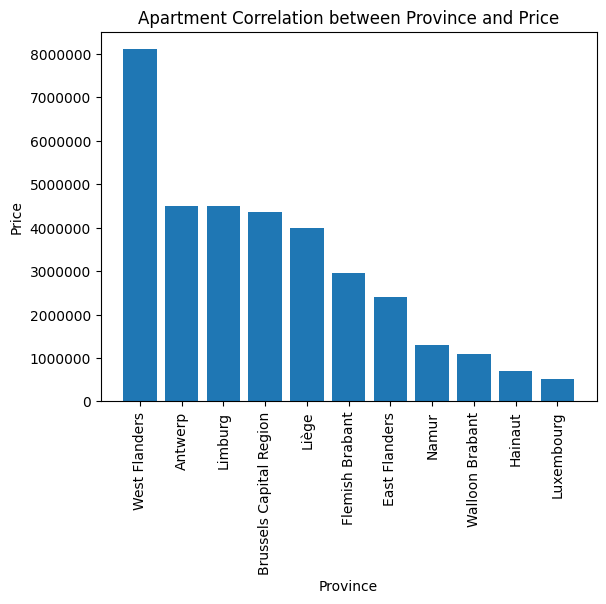

In [119]:
apt_sorted_df = apt_df.sort_values('Price', ascending=False)  

plt.bar(apt_sorted_df['Province'], apt_sorted_df['Price'])
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Apartment Correlation between Province and Price')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [120]:
house_df["Price per living area"] = house_df["Price"] / house_df["Living area"]

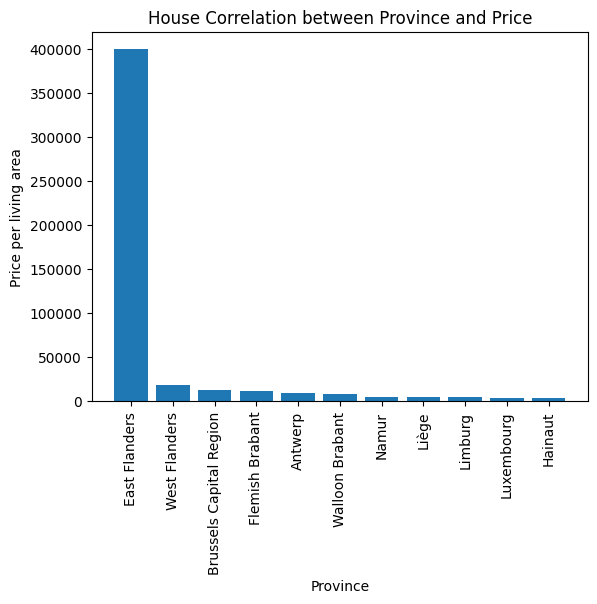

In [123]:
house_mean_sorted_df = house_df.sort_values('Price per living area', ascending=False)  

plt.bar(house_mean_sorted_df['Province'], house_mean_sorted_df['Price per living area'])
plt.xlabel('Province')
plt.ylabel('Price per living area')
plt.title('House Correlation between Province and Price')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<Axes: >

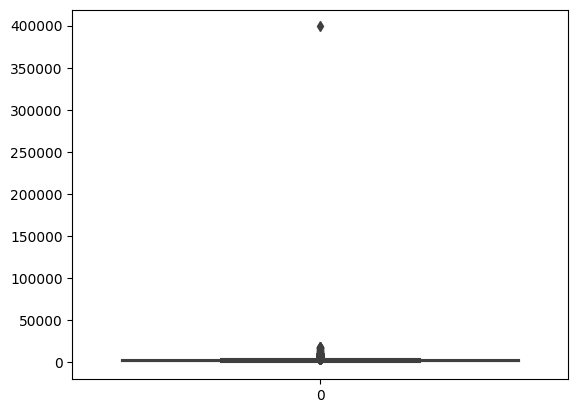

In [138]:
sns.boxplot(house_df['Price per living area'])

KeyError: "['Price', 'Living area', 'Number of rooms', 'Furnished', 'Garden', 'Garden surface', 'Terrace', 'Terrace surface', 'Open fire', 'Surface of the land', 'Number of facades', 'Swimming pool', 'Building Cond. values', 'Kitchen values', 'Primary energy consumption', 'Province', 'Price per living area'] not found in axis"